In [33]:
import math
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd

# Loading audio files

In [3]:
audio_file1='/Users/caomi/Documents/deep learning/audio signal processing/audio_files/Percussion/bass drum/bass-drum__phrase_mezzo-piano_rhythm.mp3'
audio_file2 = '/Users/caomi/Documents/deep learning/audio signal processing/audio_files/sax-player-in-the-world-170625.mp3'

In [4]:
ipd.Audio(audio_file1)

In [5]:
ipd.Audio(audio_file2)

In [19]:
# load audio files with librosa
audio1, sr = librosa.load(audio_file1)
audio2, _ = librosa.load(audio_file2)


# Extract spectrograms

In [20]:
FRAME_SIZE = 2048
HOP_SIZE = 512

audio1_spec = librosa.stft(audio1, n_fft = FRAME_SIZE, hop_length=HOP_SIZE)
audio2_spec = librosa.stft(audio2, n_fft = FRAME_SIZE, hop_length=HOP_SIZE)


In [21]:
audio1_spec.shape

(1025, 653)

In [22]:
audio1_spec_transpose = audio1_spec.T
audio1_spec_transpose.shape

(653, 1025)

## Calculate Band Energy Ratio


In [23]:
def calculate_split_frequency_bin(spectrogram, split_frequency, sample_rate):
    frequency_range = sample_rate / 2 
    frequency_delta_per_bin = frequency_range / spectrogram.shape[0]
    split_frequency_bin = np.floor(split_frequency / frequency_delta_per_bin) #10.4 -> 10.0

    return int(split_frequency_bin)

In [24]:
split_frequency_bin = calculate_split_frequency_bin(audio1_spec, 2000, 22050)
split_frequency_bin

185

In [25]:
def calculate_band_energy_ratio(spectrogram, split_frequency, sample_rate):
    split_frequency_bin = calculate_split_frequency_bin(spectrogram, split_frequency, sample_rate)

    # move to the power spectrogram
    power_spec = np.abs(spectrogram) ** 2
    power_spec = power_spec.T

    band_energy_ratio = []

    # calculate BER for each frame
    for frequencies_in_frame in power_spec:
        sum_power_low_frequencies = np.sum(frequencies_in_frame[:split_frequency_bin])
        sum_power_high_frequencies = np.sum(frequencies_in_frame[split_frequency_bin:])
        ber_current_frame = sum_power_low_frequencies / sum_power_high_frequencies
        band_energy_ratio.append(ber_current_frame)

    return np.array(band_energy_ratio)

In [26]:
ber_audio1 = calculate_band_energy_ratio(audio1_spec, 2000, sr)

In [27]:
ber_audio1.shape

(653,)

In [28]:
ber_audio2 = calculate_band_energy_ratio(audio2_spec, 2000, sr)

In [29]:
ber_audio2.shape

(691,)

# Visualize Band Energy Ratio curves

In [35]:
frames1 = range(len(ber_audio1))
t1 = librosa.frames_to_time(frames1, hop_length=HOP_SIZE)

frames2 = range(len(ber_audio2))
t2 = librosa.frames_to_time(frames2, hop_length=HOP_SIZE)

In [31]:
t.shape

(653,)

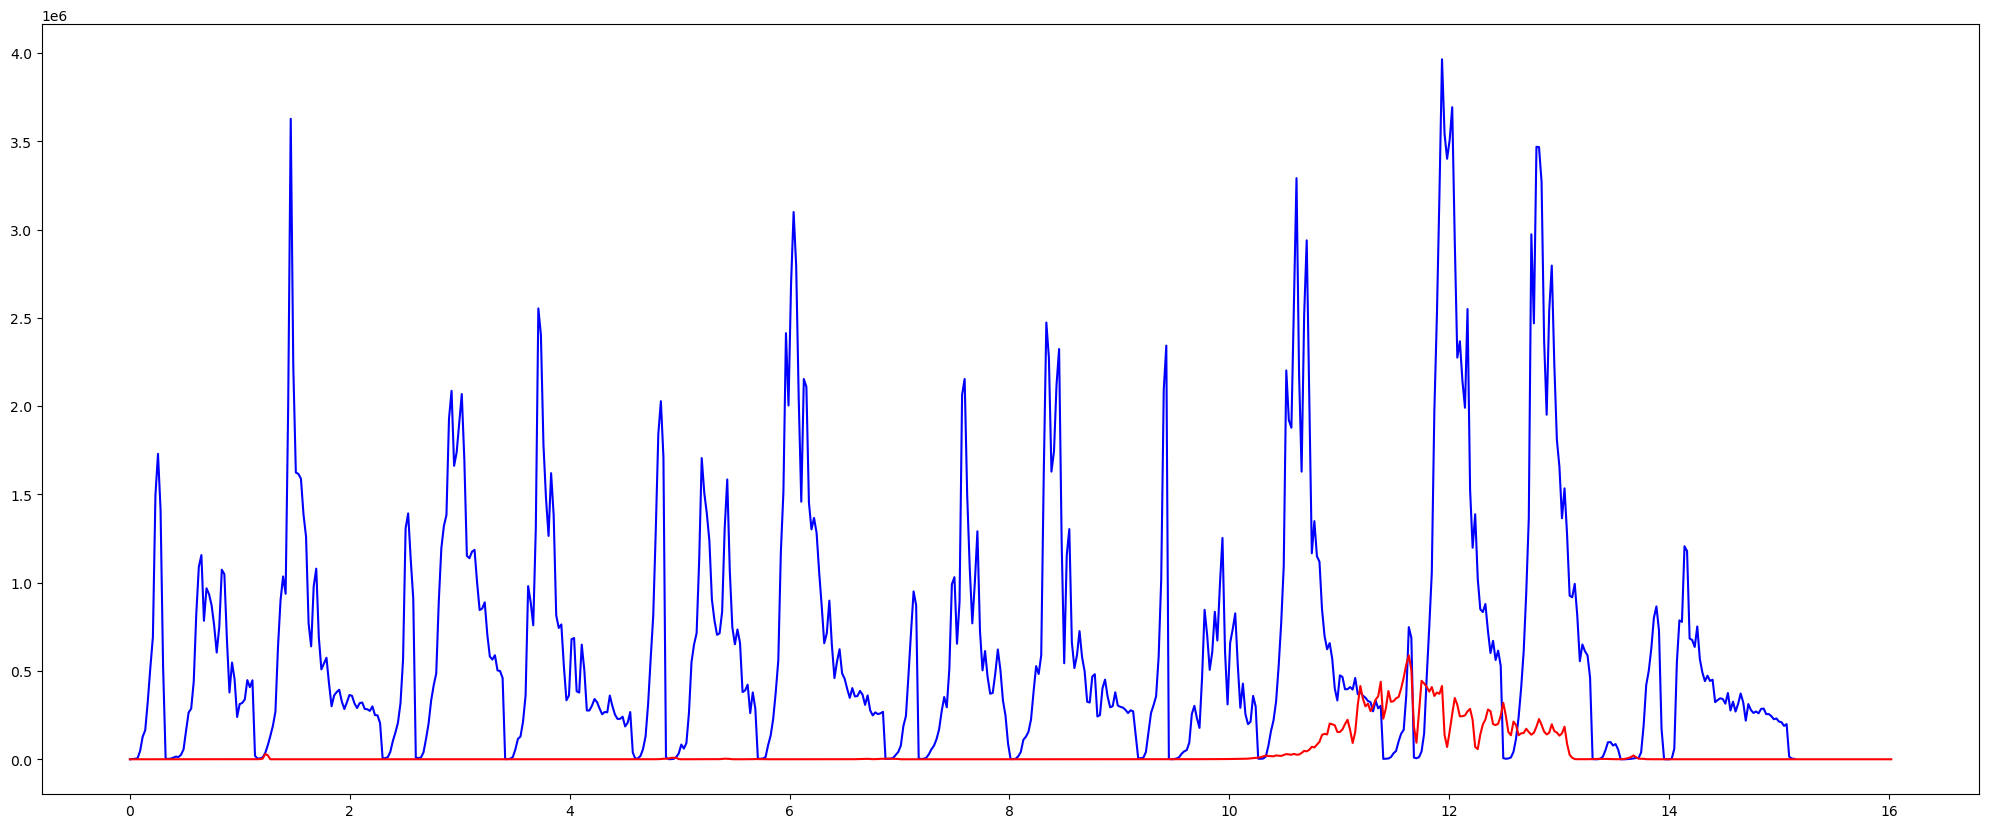

In [36]:
plt.figure(figsize=(25,10))

plt.plot(t1, ber_audio1, color='b')
plt.plot(t2, ber_audio2, color='r')

plt.show()